# Training on the Lotka-Volterra system

In [1]:
# ruff: noqa: E402
%run _common.ipynb
%matplotlib inline
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import lightning
from lightning.pytorch.loggers import WandbLogger

from node_homotopy.training import VanillaTraining
from node_homotopy.experiments.common import make_trainer
from node_homotopy.experiments.lotka_volterra import (
    make_lotka_dataset,
    make_lotka_model,
)

## 1. Generate dataset

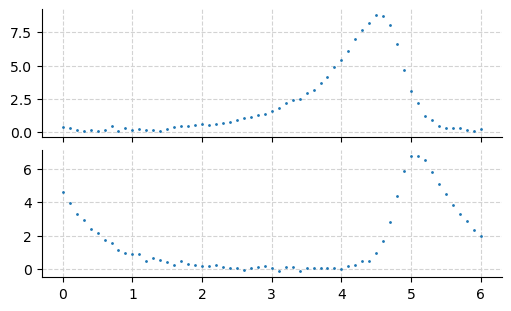

In [2]:
dataset = make_lotka_dataset(t_end=6.1)
sample = dataset[0]

fig, axes = plt.subplots(dataset.n_dim, 1, sharex=True, constrained_layout=True)
for i, ax in enumerate(axes):
    ax.plot(sample["t"], sample["u"][i], ".")

## 2. Create model

In [3]:
RANDOM_SEED = 10
lightning.seed_everything(RANDOM_SEED)  # Fix random seed for reproducibility

neuralode = make_lotka_model("blackbox", nodes_per_layer=32)
training = VanillaTraining(neuralode, lr=5e-3)

Seed set to 10


## 3. Prepare for training

In [4]:
WANDB_PROJECT = "lotka_volterra"
WANDB_ENTITY = "jhelab"  # Change to your wandb username/teamname

dataloader = DataLoader(dataset, batch_size=1, num_workers=8, pin_memory=True)

logger = WandbLogger(
    project=WANDB_PROJECT,
    entity=WANDB_ENTITY,
    save_dir=f"../lightning/{WANDB_PROJECT}",
)

# Can also pass None to the logger to only log to the terminal
# logger = None

trainer = make_trainer(max_epochs=4000, logger=logger)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [5]:
trainer.fit(training, dataloader)

You are using a CUDA device ('NVIDIA GeForce RTX 3060 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: jhko725 (jhelab). Use `wandb login --relogin` to force relogin


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type     | Params
-------------------------------------------
0 | model         | Blackbox | 162   
1 | loss_function | MSELoss  | 0     
-------------------------------------------
162       Trainable params
0         Non-trainable params
162       Total params
0.001     Total estimated model params size (MB)


Epoch 0:   0%|          | 0/1 [00:00<?, ?it/s] 

/home/jhko725/mambaforge/envs/homotopy/lib/python3.11/site-packages/lightning/pytorch/utilities/data.py:77: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 61. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 9:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0al1, mse=5.690]        

/home/jhko725/mambaforge/envs/homotopy/lib/python3.11/site-packages/lightning/pytorch/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


## 4. Create a gray-box model

In [7]:
RANDOM_SEED = 10
lightning.seed_everything(RANDOM_SEED)  # Fix random seed for reproducibility

neuralode = make_lotka_model("graybox", nodes_per_layer=20)
training = VanillaTraining(neuralode, lr=5e-3)

Global seed set to 10


In [8]:
WANDB_PROJECT = "lotka_refactored_test"
WANDB_ENTITY = "jhelab"

dataloader = DataLoader(dataset, batch_size=1, num_workers=8, pin_memory=True)

logger = WandbLogger(
    project=WANDB_PROJECT,
    entity=WANDB_ENTITY,
    save_dir=f"../lightning/{WANDB_PROJECT}",
)

trainer = make_trainer(max_epochs=4000, logger=logger)

/home/jhko725/mambaforge/envs/neuralode/lib/python3.10/site-packages/pytorch_lightning/loggers/wandb.py:396: UserWarning: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [9]:
trainer.fit(training, dataloader)

/home/jhko725/mambaforge/envs/neuralode/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:615: UserWarning: Checkpoint directory ../lightning/lotka_refactored_test/lotka_refactored_test/ob5zz7qt/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type                 | Params
-------------------------------------------------------
0 | model         | LotkaVolterraGrayBox | 1.2 K 
1 | loss_function | MSELoss              | 0     
-------------------------------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Epoch 79: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s, v_num=z7qt, mse=7.150] 

/home/jhko725/mambaforge/envs/neuralode/lib/python3.10/site-packages/pytorch_lightning/trainer/call.py:52: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")
